# BigMart

In [1]:
import pandas as pd
mart_train=pd.read_csv(r'C:\Users\W R VARUN\Desktop\Data Science\MentorBoxCo\Bigmart\train.csv')
mart_test=pd.read_csv(r'C:\Users\W R VARUN\Desktop\Data Science\MentorBoxCo\Bigmart\test.csv')
print(mart_train)
mart_test
Submission=pd.DataFrame(mart_test,columns=mart_test.columns)


     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

## EDA

In [5]:
import pandas_profiling

profile_train=mart_train.profile_report()
profile_train

In [4]:
profile_train.to_filr(r"C:\Users\W R VARUN\Desktop\Data Science\MentorBoxCo\Bigmart\eda.html")

NameError: name 'profile_train' is not defined

In [280]:
mart_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [1499]:
mart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [61]:
mart_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [1867]:
mart_train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

# Preprocessing

## 1)Nuerical Columns

In [401]:
#Filling NA values and Zero with Mean for "Item_Weight" and "Item_Visibility"
mart_train['Item_Weight'].fillna(mart_train['Item_Weight'].mean(),inplace=True)
mart_test['Item_Weight'].fillna(mart_test['Item_Weight'].mean(),inplace=True)

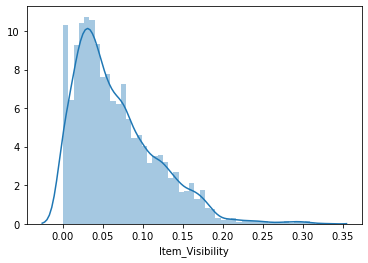

In [372]:
sns.distplot(mart_train['Item_Visibility'])

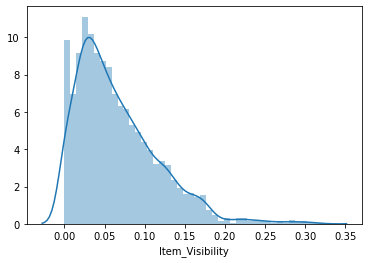

In [373]:
sns.distplot(mart_test['Item_Visibility'])

In [402]:
print(mart_train.loc[mart_train['Item_Visibility']==0,'Item_Visibility'].value_counts())
mart_test.loc[mart_test['Item_Visibility']==0,'Item_Visibility'].value_counts()

0.0    526
Name: Item_Visibility, dtype: int64


0.0    353
Name: Item_Visibility, dtype: int64

In [403]:
#"Item_Visbility" has zeros so filling it with mean 
visb_mean=mart_train.loc[mart_train['Item_Visibility']!=0.0,'Item_Visibility'].mean()
mart_train.loc[mart_train['Item_Visibility']==0,'Item_Visibility']=visb_mean

visb_mean_test=mart_test.loc[mart_train['Item_Visibility']!=0.0,'Item_Visibility'].mean()
mart_test.loc[mart_test['Item_Visibility']==0,'Item_Visibility']=visb_mean_test

In [404]:
#Difference of year from date till "2013"
mart_train['Outlet_Establishment_Year']=2013-mart_train['Outlet_Establishment_Year']
mart_test['Outlet_Establishment_Year']=2013-mart_test['Outlet_Establishment_Year']

In [405]:
mart_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,15,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.070482,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,26,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,11,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,9,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,4,Medium,Tier 3,Supermarket Type2,1845.5976


## 2)Categorical Columns

In [161]:
mart_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### Getting Only two characters as it determines food belong to which category

In [406]:
def identity(mart):
    for i in range(len(mart['Item_Identifier'])):
        mart['Item_Identifier'][i]=mart['Item_Identifier'][i][0:2]
    return mart
mart_train=identity(mart_train)
mart_test=identity(mart_test)

C:\Users\W R VARUN\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


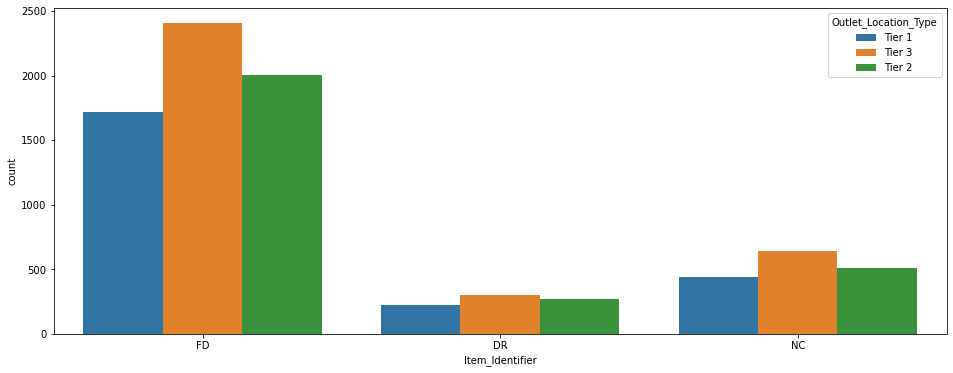

In [379]:
import seaborn as sns
plt.figure(figsize=(16,6))
sns.countplot('Item_Identifier',hue='Outlet_Location_Type',data=mart_train)

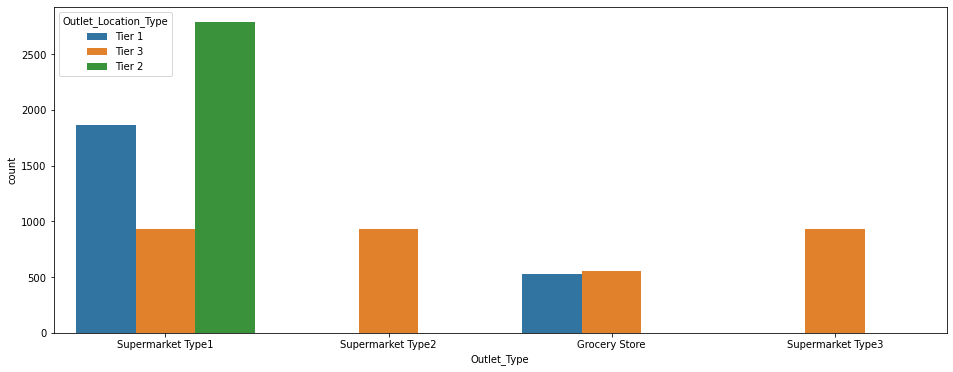

In [380]:
plt.figure(figsize=(16,6))
sns.countplot('Outlet_Type',hue='Outlet_Location_Type',data=mart_train)

### Converting to Numerical and Filling NA values

In [408]:
def Size(mart):
    mart['Outlet_Size']=mart['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})
    outlet_size= mart.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
    mart.loc[mart['Outlet_Size'].isnull(),'Outlet_Size'] = mart.loc[mart['Outlet_Size'].isnull(),'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
    return mart
mart_train=Size(mart_train)
mart_test=Size(mart_test)


Exception ignored in: <function Booster.__del__ at 0x0000020F0464F798>
Traceback (most recent call last):
  File "C:\Users\W R VARUN\anaconda3\lib\site-packages\xgboost\core.py", line 974, in __del__
    if hasattr(self, 'handle') and self.handle is not None:
KeyboardInterrupt


### Checking For "Item_Fat_Content" unique values

In [382]:
print(mart_train['Item_Fat_Content'].value_counts())
mart_test['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [383]:
def Fat(mart):
    mart['Item_Fat_Content']=mart['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
    
    return mart
mart_train=Fat(mart_train)
mart_test=Fat(mart_test)

In [384]:
#Items which are Non-Consumable will be marked as "Not-Applicable"
mart_train.loc[mart_train['Item_Identifier']=='NC','Item_Fat_Content']='Not_Applicable'
mart_test.loc[mart_test['Item_Identifier']=='NC','Item_Fat_Content']='Not_Applicable'

In [385]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
columns=['Item_Identifier','Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Outlet_Identifier']
for label in columns:
    mart_train[label]=encode.fit_transform(mart_train[label])
    mart_test[label]=encode.fit_transform(mart_test[label])

In [399]:
mart_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.300,0,0.016047,249.8092,9,1.0,0,1,3735.1380
1,0,5.920,2,0.019278,48.2692,3,1.0,2,2,443.4228
2,1,17.500,0,0.016760,141.6180,9,1.0,0,1,2097.2700
3,1,19.200,2,0.070482,182.0950,0,0.0,2,0,732.3800
4,2,8.930,1,0.070482,53.8614,1,2.0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,214.5218,1,2.0,2,1,2778.3834
8519,1,8.380,2,0.046982,108.1570,7,0.0,1,1,549.2850
8520,2,10.600,1,0.035186,85.1224,6,0.0,1,1,1193.1136
8521,1,7.210,2,0.145221,103.1332,3,1.0,2,2,1845.5976


In [387]:
mart_train=mart_train.drop(['Outlet_Establishment_Year','Item_Type'],axis=1)
mart_test=mart_test.drop(['Outlet_Establishment_Year','Item_Type'],axis=1)

In [388]:
mart_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.300,0,0.016047,249.8092,9,1.0,0,1,3735.1380
1,0,5.920,2,0.019278,48.2692,3,1.0,2,2,443.4228
2,1,17.500,0,0.016760,141.6180,9,1.0,0,1,2097.2700
3,1,19.200,2,0.070482,182.0950,0,0.0,2,0,732.3800
4,2,8.930,1,0.070482,53.8614,1,2.0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,214.5218,1,2.0,2,1,2778.3834
8519,1,8.380,2,0.046982,108.1570,7,0.0,1,1,549.2850
8520,2,10.600,1,0.035186,85.1224,6,0.0,1,1,1193.1136
8521,1,7.210,2,0.145221,103.1332,3,1.0,2,2,1845.5976


# Splitting,Scaling And Selting Features

1

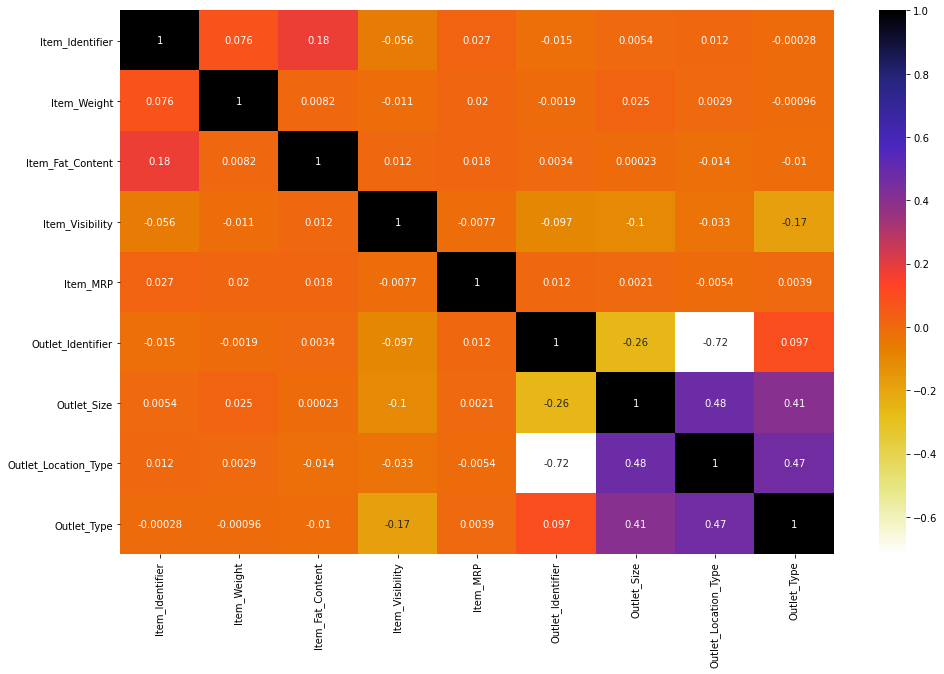

In [389]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

#X=mart_train.drop('Item_Outlet_Sales',axis=1)
#Y=mart_train['Item_Outlet_Sales']

#Spliting
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

#Scaling
scaler=StandardScaler()
x_scaled_train=scaler.fit_transform(x_train)
x_scaled_test=scaler.transform(x_test)

X_train=pd.DataFrame(x_scaled_train,columns=x_train.columns)
X_test=pd.DataFrame(x_scaled_test,columns=x_test.columns)

from sklearn.feature_selection import VarianceThreshold
var_thresh=VarianceThreshold(threshold=0.0)
var_thresh.fit(x_train)
var_thresh.get_support()                  

#Heatmap to for correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
correlation=x_train.corr()
sns.heatmap(correlation,annot=True,cmap=plt.cm.CMRmap_r)

def correlation(data,thres):
    corrs=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>thres:
                colname=corr_matrix.columns[i]
                corrs.add(colname)
    return corrs
corr_features=correlation(X_train,0.70)
len(corr_features)

#No Features are correlated more than 75%

In [390]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

## Model Building

### Using Xgboost,Randomforest and Gradient boosting as model

In [391]:
import numpy as np
import xgboost
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import auc,roc_curve,r2_score

boost=xgboost.XGBRegressor(n_estimators=900,learning_rate=0.01,max_depth=3,n_jobs=-1,reg_lambda=7).fit(X_train,y_train)
pred_train1=boost.predict(X_train)
pred_test1=boost.predict(X_test)
print('RMSE of Train is {} and Test is {}'.format(np.sqrt(mean_squared_error(y_train,pred_train1)),np.sqrt(mean_squared_error(y_test,pred_test1))))

forest=RandomForestRegressor(n_estimators=700,max_depth=5,min_samples_leaf=5).fit(X_train,y_train)
pred_train2=forest.predict(X_train)
pred_test2=forest.predict(X_test)
print('RMSE of Train is {} and Test is {}'.format(np.sqrt(mean_squared_error(y_train,pred_train2)),np.sqrt(mean_squared_error(y_test,pred_test2))))

      
grad=GradientBoostingRegressor(n_estimators=800,learning_rate=0.01,max_depth=5,criterion='mse').fit(X_train,y_train)
pred_train3=grad.predict(X_train)
pred_test3=grad.predict(X_test)
print('RMSE of Train is {} and Test is {}'.format(np.sqrt(mean_squared_error(y_train,pred_train3)),np.sqrt(mean_squared_error(y_test,pred_test3))))


RMSE of Train is 1031.210047994835 and Test is 1106.488845711502
RMSE of Train is 1052.760350473262 and Test is 1112.3179981851708
RMSE of Train is 942.517450838195 and Test is 1117.965849328124


In [392]:
from sklearn import model_selection ,metrics

cv=model_selection.cross_val_score(boost,X,Y,cv=5,scoring='neg_mean_squared_error').mean()
np.sqrt(np.abs(cv))

1082.605734369661

## We are finalizing the model with XGBOOST
